# 9251 LCS

### Q)
LCS(Longest Common Subsequence, 최장 공통 부분 수열)문제는 두 수열이 주어졌을 때, 모두의 부분 수열이 되는 수열 중 가장 긴 것을 찾는 문제이다.

예를 들어, ACAYKP와 CAPCAK의 LCS는 ACAK가 된다.

### Input)
첫째 줄과 둘째 줄에 두 문자열이 주어진다. 문자열은 알파벳 대문자로만 이루어져 있으며, 최대 1000글자로 이루어져 있다.

### Output)
첫째 줄에 입력으로 주어진 두 문자열의 LCS의 길이를 출력한다.

### Source Code)

In [ ]:
from sys import stdin
import sys

input = stdin.readline

str1 = input().strip()
str2 = input().strip()
dp = [0] * (max(len(str1), len(str2)) + 1)

for i in range(1, len(str1)+1):
    for j in range(len(str2), 0, -1):
        if str1[i-1] == str2[j-1]:
            dp[j] = max(dp[:j]) + 1

print(max(dp))

코드를 위와 같이 작성했을 때는 93%에서 시간초과가 발생하였다.

일단 알고리즘은 다음과 같이 생각했다.

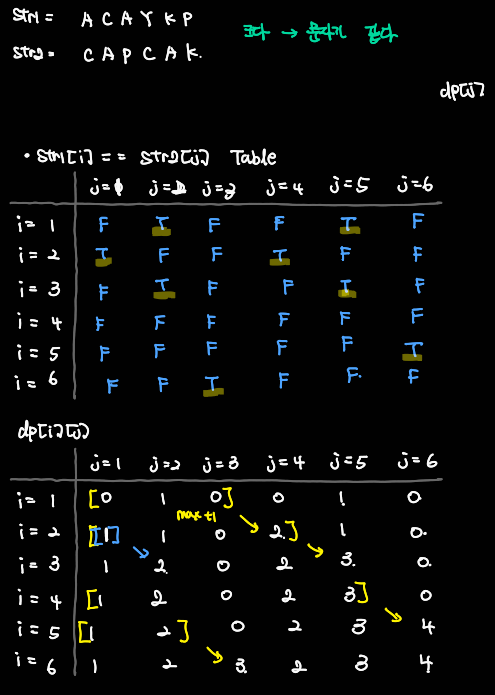

여기서는 이차원 배열로 생각을 했는데 이를 일차원으로 줄일 수 있을거라 생각해서 위와 같이 코드를 작성했다.

시간 초과를 해결하기 위해 여러 블로그를 뒤져보았다.
그렇게 해서 찾은 코드와 내 코드를 비교해보았다.
다음 코드가 블로그에서 찾은 코드이다.

https://myjamong.tistory.com/317

In [ ]:
import sys
read = sys.stdin.readline

word1, word2 = read().strip(), read().strip()
l1, l2 = len(word1), len(word2)
cache = [0] * l2

for i in range(l1):
    cnt = 0
    for j in range(l2):
        if cnt < cache[j]:
            cnt = cache[j]
        elif word1[i] == word2[j]: # 1
            cache[j] = cnt + 1
print(max(cache))

1 에서 처럼 elif를 사용하는 이유는 다음 반례를 확인하면 된다.

XXXXXF
XFXXXQ

이 반례의 경우 글자가 같은지를 먼저 비교해버리면 누적값이 추가되지 않는다.

따라서 반드시 누적변수의 값이 해당 위치의 dp 값보다 작은지 여부부터 확인해야한다.